# A least-squares fitting execise in gas chromatography.

The csv file `nm2023/data/exp_data.csv` contains data from a gas chromatography experiment. The first column corresponds to the flow rate, $u$, in milli-Litre-per-minute (mL/min), and the second column corresponds to the plate height, $H(u)$, in millimeter (mm). 

Fit this data to the [van Deemter equation](https://en.wikipedia.org/wiki/Van_Deemter_equation), $H(u)=A+B/u+Cu$, and determine the diffusion parameters, $A$, $B$, and $C$. The meaning of the parameters are defined in the wiki article linked above. 

Report the following in a Jupyter notebook (rename this file as `ClassProject_vanDeemter_23Feb2023_githubhandle.ipynb`) and send it via google classroom:   
- The diffusion parameters, $A$, $B$, and $C$  
- Accuracy of your fit in terms of mean absolute deviation (MAD), root mean square deviation (RMSD), maximum absolute error (MAD), and Pearson correlation coefficient. 
- Plot the actual data along with your fitted function.


# Solution

## Codes

In [36]:
import numpy as np

myfile=open('..\data\exp_data.csv','r')

u=np.array([])
H=np.array([])

iline=0
for line in myfile:
    if iline > 0:           
        str=line.split(',')  
        valu=eval(str[0])
        valH=eval(str[1])
        u=np.append(u,[valu])
        H=np.append(H,[valH])
        
    iline=iline+1
myfile.close() 

D=15
N=u.shape[0]

print('#    i','     a_i')
a=np.polyfit(u,H,D)
for i in range(D+1):
    print('{:6d}{:15.8f}'.format(i,a[i]))

p = np.poly1d(a)
print("\nThe fitted polynomial is \n",p,"\n\n")

Hfit=np.polyval(a,u)

err=H-Hfit
abs_err = np.abs(H-Hfit)
perc_err=np.abs( abs_err/H ) *100

print('#    i','     u_i           H_i             H_i (fit)      error          |error|      % error')
for i in range(N):
    print('{:6d}{:15.8f}{:15.8f}{:15.8f}{:15.8f}{:15.8f}{:15.8f}'.format(i,u[i],H[i],Hfit[i],err[i],abs_err[i],perc_err[i]))
    
def chol(A,b):
    from scipy.linalg import cho_factor, cho_solve
    D=b.shape[0]
    
    c=np.zeros(D,float)

    L, low = cho_factor(A)   

    c = cho_solve((L, low), b)
    return c


def polyfit(x,y,D):
    '''
        Fits a given set of data x,y to a polynomial of degree D
    '''
    import numpy as np 
        
    X=np.vander(x, D+1, increasing=True)
    XT=np.transpose(X)
    
    A=np.matmul(XT,X)
    
    b=np.matmul(XT,y)

    c=chol(A,b)
    
    return(c)
D=2
c=polyfit(u,H,D)

for i in range(D+1):
    print("coefficient of u^",i," is ",c[i])
    
print('No. of data points, N: ', N)
print('Degree of the polynomial, D: ', D)

mae=np.mean(abs_err)
print("Mean absolute error: ", mae)

cerr=err-np.mean(err)
var=np.mean(cerr**2)
std=np.sqrt(var)
print("Standard deviation:  ", std)

#    i      a_i
     0    -0.00000000
     1     0.00000000
     2    -0.00000000
     3     0.00000000
     4    -0.00000000
     5     0.00000000
     6    -0.00000000
     7     0.00000002
     8    -0.00000095
     9     0.00003958
    10    -0.00115576
    11     0.02303718
    12    -0.30051043
    13     2.43123458
    14   -11.35940288
    15    31.05710967

The fitted polynomial is 
             15             14             13             12
-2.494e-25 x  + 3.074e-22 x  - 1.705e-19 x  + 5.632e-17 x 
              11             10             9            8
 - 1.233e-14 x  + 1.886e-12 x  - 2.071e-10 x + 1.65e-08 x
              7             6            5           4          3
 - 9.538e-07 x + 3.958e-05 x - 0.001156 x + 0.02304 x - 0.3005 x
          2
 + 2.431 x - 11.36 x + 31.06 


#    i      u_i           H_i             H_i (fit)      error          |error|      % error
     0     2.50505000    13.94430000    13.93630229     0.00799771     0.00799771     0.05735466
   

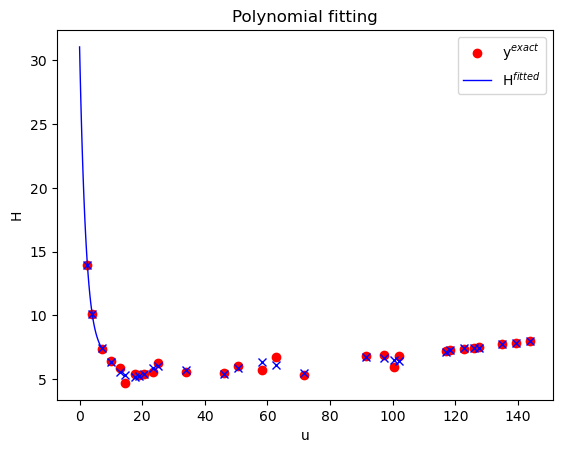

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(u,H,'o',color='r',linewidth=1,label='y$^{exact}$')
plt.plot(u,Hfit,'x',color='b',linewidth=1)

ugrids=np.linspace(0,7, 51)
Hgridsfit=np.polyval(a,ugrids)

plt.plot(ugrids,Hgridsfit,'-',color='b',linewidth=1,label='H$^{fitted}$')

plt.legend()

plt.xlabel("u")
plt.ylabel("H")
plt.title('Polynomial fitting')

plt.show()

# Pearson's correlation coefficient

In [18]:
my_rho = np.corrcoef(H, Hfit)[0,1]  
print('Pearson correlation coefficient is: ', my_rho)

Pearson correlation coefficient is:  0.9881333089199571


Text(0.5, 1.0, 'Scatterplot')

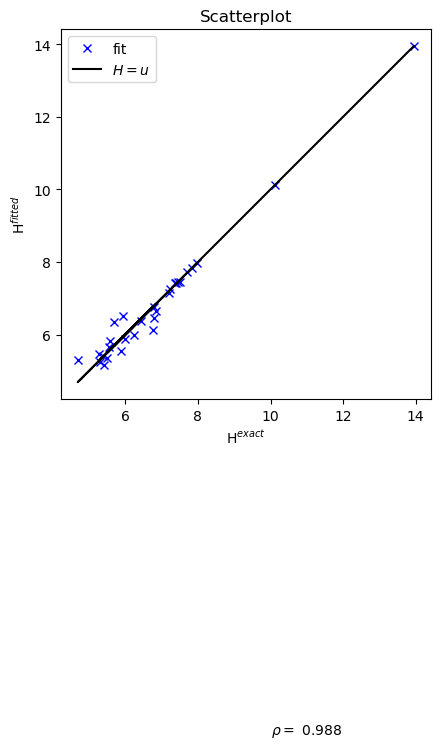

In [23]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()                          
au = fig.add_subplot(111)                  
plt.plot(H,Hfit,'x',color='blue')
au.set_aspect('equal', adjustable='box')   
plt.plot(H,H,'-',color='black')

plt.text(10,-5, r'$\rho=$ {0:5.3f}'.format(my_rho), fontsize=10)

plt.legend(['fit','$H=u$'])

plt.xlabel("H$^{exact}$")
plt.ylabel("H$^{fitted}$")
plt.title('Scatterplot')

# 

## Plot

In [2]:
# Plot here

## Accuracy of the fit

| A       | B       | C       | MAD     | RMSD    | Pearson coefficient |
|---------|---------|---------|---------|---------|---------------------|
| 8.18331140735744| -0.08130804288974015 |  0.0005972406390972879| 0.1759235 | 0.2688883915919185 | 0.98813 |